In [1]:
# Descargar el dataset Fruits 360
!git clone https://github.com/Horea94/Fruit-Images-Dataset.git


Cloning into 'Fruit-Images-Dataset'...
remote: Enumerating objects: 385861, done.
remote: Counting objects: 100% (8696/8696), done.
remote: Compressing objects: 100% (8662/8662), done.
remote: Total 385861 (delta 39), reused 8687 (delta 34), pack-reused 377165 (from 1)
Receiving objects: 100% (385861/385861), 2.10 GiB | 17.46 MiB/s, done.
Resolving deltas: 100% (1199/1199), done.
Updating files: 100% (90503/90503), done.


In [2]:
# Instalación de librerías
!pip install tensorflow keras


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os


In [4]:
# Definimos paths
train_dir = '/content/Fruit-Images-Dataset/Training'
test_dir = '/content/Fruit-Images-Dataset/Test'

# Crear generadores de imágenes
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Cargar datos
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)


Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [5]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# ... (Your existing code for data loading and preprocessing) ...

# Load pre-trained MobileNetV2 model (excluding top classification layer)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers (optional, but often recommended for fine-tuning)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

<ipython-input-5-de42c118dd0e>:9: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(100, 100, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 50, 50,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 50, 50,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 50, 50,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 50, 50,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 50, 50,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 50, 50,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 50, 50,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 50, 50,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 50, 50,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 50, 50,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 50, 50,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 51, 51,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 25, 25,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 25, 25,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 25, 25,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 25, 25,    │      2,304 │ block_1_depthwis

 Total params: 3,704,003 (14.13 MB)

 Trainable params: 1,446,019 (5.52 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [6]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator
)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2116/2116 ━━━━━━━━━━━━━━━━━━━━ 71s 26ms/step - accuracy: 0.9085 - loss: 0.4223 - val_accuracy: 0.8895 - val_loss: 0.5266
Epoch 2/15
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 44s 21ms/step - accuracy: 0.9900 - loss: 0.0383 - val_accuracy: 0.9570 - val_loss: 0.2147
Epoch 3/15
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 43s 20ms/step - accuracy: 0.9951 - loss: 0.0235 - val_accuracy: 0.9545 - val_loss: 0.3016
Epoch 4/15
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 44s 21ms/step - accuracy: 0.9962 - loss: 0.0166 - val_accuracy: 0.9591 - val_loss: 0.2322
Epoch 5/15
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 44s 21ms/step - accuracy: 0.9974 - loss: 0.0134 - val_accuracy: 0.9541 - val_loss: 0.3263
Epoch 6/15
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 44s 21ms/step - accuracy: 0.9971 - loss: 0.0132 - val_accuracy: 0.9600 - val_loss: 0.3456
Epoch 7/15
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 43s 20ms/step - accuracy: 0.9979 - loss: 0.0111 - val_accuracy: 0.9421 - val_loss: 0.6113
Epoch 8/15
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 43s 20ms/step - accuracy: 0.9972 - loss: 0.02

In [7]:
model.save('fruits_modelMbNEtV2.h5')
model.save('fruits_modelMbNEtV2.keras')


In [8]:
from google.colab import files
files.download('fruits_modelMbNEtV2.keras')
files.download('fruits_modelMbNEtV2.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

709/709 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9673 - loss: 0.5257
Test Loss: 0.5667
Test Accuracy: 0.9637


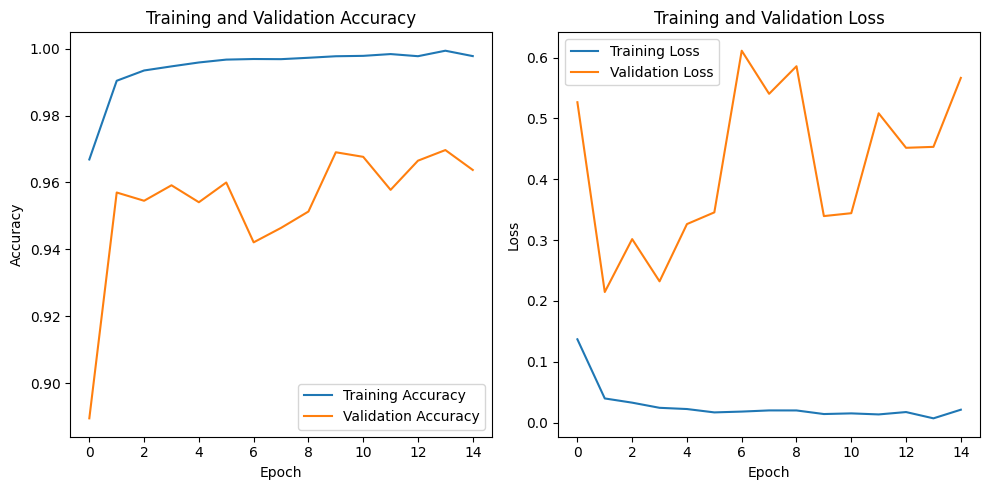

In [10]:
# Muestra las métricas de entrenamiento
import matplotlib.pyplot as plt

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

Saving Manzana2.jpg to Manzana2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted Class: Apple Braeburn
Confidence: 0.9997


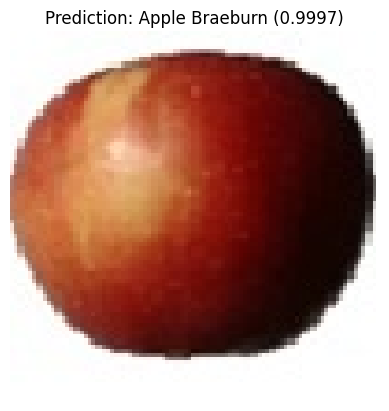

In [11]:
# Prueba del modelo entrenado
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# ... (previous code remains the same) ...

# Load the saved model
from tensorflow.keras.models import load_model
model = load_model('fruits_modelMbNEtV2.h5') # or 'fruits_model.keras'

# Function to predict the image and show results
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(100, 100))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.  # Normalize the image

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)

    # Get the class labels from the training generator
    class_labels = list(train_generator.class_indices.keys())

    predicted_class = class_labels[predicted_class_index]
    confidence = prediction[0][predicted_class_index]

    print(f"Predicted Class: {predicted_class}")
    print(f"Confidence: {confidence:.4f}")

    # Display the image
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class} ({confidence:.4f})")
    plt.axis('off')
    plt.show()


# Example usage:
# Upload an image to your Colab environment
uploaded = files.upload()
image_name = list(uploaded.keys())[0]

predict_image(image_name)
